<a href="https://colab.research.google.com/github/zion645/img_recog_cnn/blob/master/CNN_cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip cats_and_dogs.zip

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/train/
   creating: cats_and_dogs/train/cats/
  inflating: cats_and_dogs/train/cats/cat.0.jpg  
  inflating: cats_and_dogs/train/cats/cat.1.jpg  
  inflating: cats_and_dogs/train/cats/cat.10.jpg  
  inflating: cats_and_dogs/train/cats/cat.100.jpg  
  inflating: cats_and_dogs/train/cats/cat.101.jpg  
  inflating: cats_and_dogs/train/cats/cat.102.jpg  
  inflating: cats_and_dogs/train/cats/cat.103.jpg  
  inflating: cats_and_dogs/train/cats/cat.104.jpg  
  inflating: cats_and_dogs/train/cats/cat.105.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.108.jpg  
  inflating: cats_and_dogs/train/cats/cat.109.jpg  
  inflating: cats_and_dogs/train/cats/cat.11.jpg  
  inflating: cats_and_dogs/train/cats/cat.110.jpg  
  inflating: cats_and_dogs/train/cats/cat.111.jpg  
  inflating: cats_and_dogs/train/cats/cat.112

In [ ]:
import tensorflow as tf

In [ ]:
#preprocessing, the goal is to make the data compatible for CNN... this means that all images have to be same size
#this is how we determine the size of the image that needs to be reducecd to
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [ ]:
#pass the images through the generator
trainImageData = train_generator.flow_from_directory("cats_and_dogs/train/",
                                                     batch_size=32, #the amunt of images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     )


testImageData = train_generator.flow_from_directory("cats_and_dogs/validation/",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
trainImageData.filenames

['cats/cat.0.jpg',
 'cats/cat.1.jpg',
 'cats/cat.10.jpg',
 'cats/cat.100.jpg',
 'cats/cat.101.jpg',
 'cats/cat.102.jpg',
 'cats/cat.103.jpg',
 'cats/cat.104.jpg',
 'cats/cat.105.jpg',
 'cats/cat.106.jpg',
 'cats/cat.107.jpg',
 'cats/cat.108.jpg',
 'cats/cat.109.jpg',
 'cats/cat.11.jpg',
 'cats/cat.110.jpg',
 'cats/cat.111.jpg',
 'cats/cat.112.jpg',
 'cats/cat.113.jpg',
 'cats/cat.114.jpg',
 'cats/cat.115.jpg',
 'cats/cat.116.jpg',
 'cats/cat.117.jpg',
 'cats/cat.118.jpg',
 'cats/cat.119.jpg',
 'cats/cat.12.jpg',
 'cats/cat.120.jpg',
 'cats/cat.121.jpg',
 'cats/cat.122.jpg',
 'cats/cat.123.jpg',
 'cats/cat.124.jpg',
 'cats/cat.125.jpg',
 'cats/cat.126.jpg',
 'cats/cat.127.jpg',
 'cats/cat.128.jpg',
 'cats/cat.129.jpg',
 'cats/cat.13.jpg',
 'cats/cat.130.jpg',
 'cats/cat.131.jpg',
 'cats/cat.132.jpg',
 'cats/cat.133.jpg',
 'cats/cat.134.jpg',
 'cats/cat.135.jpg',
 'cats/cat.136.jpg',
 'cats/cat.137.jpg',
 'cats/cat.138.jpg',
 'cats/cat.139.jpg',
 'cats/cat.14.jpg',
 'cats/cat.140.jpg',
 

In [ ]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 4096)              1

In [ ]:
#Compile

model.compile(optimizer="adam",
              loss="binary_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [ ]:
len(trainImageData.filenames) // trainImageData.batch_size

62

In [ ]:
# Fit the model

model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

Epoch 1/10
62/62 [==============================] - 21s 132ms/step - loss: 0.7128 - accuracy: 0.4903 - val_loss: 0.6923 - val_accuracy: 0.5887
Epoch 2/10
62/62 [==============================] - 8s 127ms/step - loss: 0.6668 - accuracy: 0.5935 - val_loss: 0.6649 - val_accuracy: 0.6270
Epoch 3/10
62/62 [==============================] - 8s 128ms/step - loss: 0.6012 - accuracy: 0.6814 - val_loss: 0.6557 - val_accuracy: 0.6018
Epoch 4/10
62/62 [==============================] - 8s 127ms/step - loss: 0.5240 - accuracy: 0.7434 - val_loss: 0.6281 - val_accuracy: 0.6663
Epoch 5/10
62/62 [==============================] - 8s 129ms/step - loss: 0.4394 - accuracy: 0.7901 - val_loss: 0.7745 - val_accuracy: 0.6744
Epoch 6/10
62/62 [==============================] - 8s 128ms/step - loss: 0.3477 - accuracy: 0.8455 - val_loss: 0.7291 - val_accuracy: 0.6734
Epoch 7/10
62/62 [==============================] - 8s 129ms/step - loss: 0.2503 - accuracy: 0.8933 - val_loss: 0.9538 - val_accuracy: 0.6683
Epoch

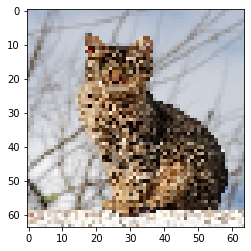

In [ ]:
#Deployment

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('cat10.jpg', target_size=(64,64))
plt.imshow(imageToPredict)

In [ ]:
# Step 2 - Convert image to numpy array

myimagenparray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myimagenparray.shape

(64, 64, 3)

In [ ]:
#Step 3 - Make the image compatible for the model by adding n

mycompatibleimage = np.expand_dims(myimagenparray, axis=0)
mycompatibleimage.shape

(1, 64, 64, 3)

In [ ]:
#Step 4 - Prediction

prediction = model.predict(mycompatibleimage)

In [ ]:
if prediction == 0:
  print("Its a Cat!")
else:
  print("Its a Dog!")

Its a Dog!
